# Question 2

**Q.2. [20 points] Programming Exercise.**
Submit the GitHub link for your solution, which should contain the source code, datasets generated, and any other relevant material). Write a program to generate an Erdӧs-Renyi (E-R) network 𝐺(𝑛, 𝑝), were for at least three input configurations, i.e., three set of values for 𝑛 and 𝑝. For instance, one such configuration could be 𝑛 = 7 ∗ 106 and 𝑝 = 10−2. For each configuration, calculate the following network properties and compare them with the theoretical prediction for an Erdӧs-Renyi network with the same configuration. Run each configuration at least 30 times and report the average estimates for each configuration.

*  i. The average degree of the network.
*  ii. Average clustering coefficient of the network.
*  iii. The average path length.
*  iv. Plot the degree distribution for the three chosen configurations. Do they center on the average degree?

*10 points for implementation with sharing of a working code; 15 points for calculations i, ii, and iii; 15 points for the plots of degree distributions.*

### Setup

In [6]:
# !pip install igraph
import networkx as nx
# import igraph as ig
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as math

### Generating The ER Network

In [7]:
# G = nx.Graph()
# def ER_Network_maker(n, p):
#   G.add_nodes_from(range(n))
#   for i in range(n):
#     for j in range(i+1, n):
#       if random.random() < p:
#         G.add_edge(i, j)
#   return G


def run_er_experiment(n, p, num_runs=30):
    avg_degree_list = []
    clustering_list = []
    path_length_list = []

    for _ in range(num_runs):
        #generating random graph
        G = nx.fast_gnp_random_graph(n, p)

        #avg degree
        # <k> = 2 * E / N
        E=G.number_of_edges()
        N=G.number_of_nodes()
        avg_deg = 2.0*E/N
        avg_degree_list.append(avg_deg)

        #avg clustering
        c = nx.average_clustering(G)
        clustering_list.append(c)

        #average path length on largest CC
        #if the graph is disconnected then we only look at largest component
        if nx.is_connected(G):
            apl = nx.average_shortest_path_length(G)
        else:
            largest_cc = max(nx.connected_components(G), key=len)
            G_lcc = G.subgraph(largest_cc).copy()
            apl = nx.average_shortest_path_length(G_lcc)
        path_length_list.append(apl)

    return (np.mean(avg_degree_list),
            np.mean(clustering_list),
            np.mean(path_length_list))

### Plotting for Degree Distribution

In [8]:
def plot_degree_distribution(G, title="Degree Distribution"):
    degree_hist = nx.degree_histogram(G)
    plt.plot(degree_hist, marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Number of Nodes")
    plt.show()

### Configuration Flop

In [ ]:
# n1 = 10
# p1 = 10**2
# G = ER_Network_maker(n1, p1)

# print("Number of Nodes: ", nx.number_of_nodes(G))
# print("Number of Edges: ", nx.number_of_edges(G))
# print("Density: ", nx.density(G))
# print("Average Degree: ", nx.average_degree_connectivity(G))
# print("Clustering Coefficient: ", nx.average_clustering(G))
# print("Average Path Length: ", nx.average_shortest_path_length(G))
# nx.graphviz_layout(G, prog='dot')
# nx.draw(G, with_labels=True)

# # # The average degree of the network.
# # print("Average Degree: ", nx.average_degree_connectivity(G))

# # # Average clustering coefficient of the network.
# # print("Clustering Coefficient: ", nx.average_clustering(G))

# # # The average path length.
# # print("Average Path Length: ", nx.average_shortest_path_length)

# #Plot the degree distribution for the three chosen configurations.
# plt.plot(nx.degree_histogram(G))
# plt.show()

# # Do they center on the average degree? (y/n)

### Configurations


==== Running config: n=1000, p=0.01 ====
Estimated average degree: 9.9717 vs. theory ~ p*(n-1) = 9.9900
Estimated clustering:     0.0099 vs. theory ~ p = 0.01
Estimated avg path len:   3.2600 (giant comp) vs. theory ~ log(n)/log(p*n): 3.0


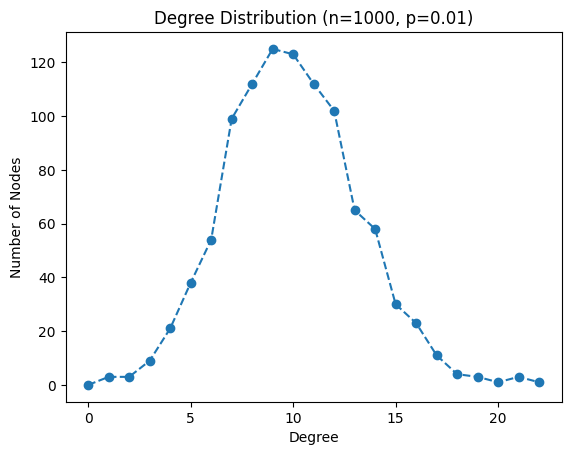


==== Running config: n=2000, p=0.005 ====
Estimated average degree: 10.0298 vs. theory ~ p*(n-1) = 9.9950
Estimated clustering:     0.0050 vs. theory ~ p = 0.005
Estimated avg path len:   3.5564 (giant comp) vs. theory ~ log(n)/log(p*n): 3.3010299956639813


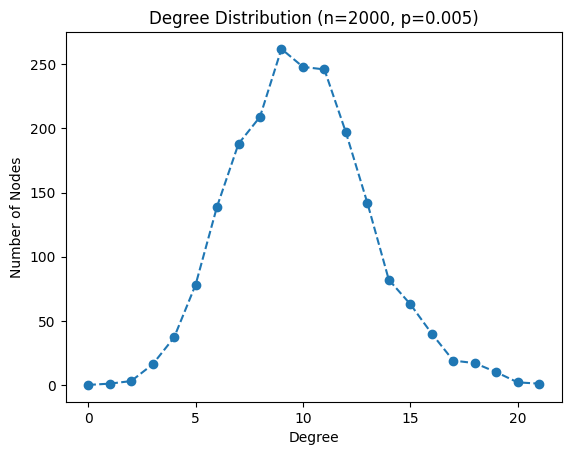


==== Running config: n=5000, p=0.002 ====
Estimated average degree: 10.0179 vs. theory ~ p*(n-1) = 9.9980
Estimated clustering:     0.0020 vs. theory ~ p = 0.002
Estimated avg path len:   3.9446 (giant comp) vs. theory ~ log(n)/log(p*n): 3.6989700043360187


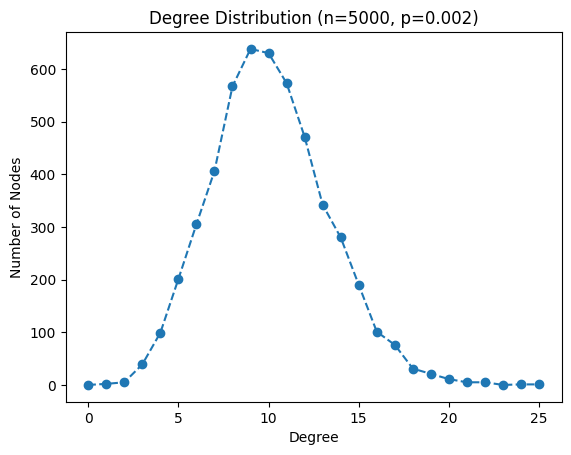

In [9]:
configs = [
    (1000, 0.01),   #small
    (2000, 0.005),  #slightly bigger
    (5000, 0.002)   #bigger still
]

for (n, p) in configs:
    print(f"\n==== Running config: n={n}, p={p} ====")

    #run 30 times and compute avg stats
    avg_deg, avg_clust, avg_pl = run_er_experiment(n, p, num_runs=30)
    print(f"Estimated average degree: {avg_deg:.4f} vs. theory ~ p*(n-1) = {p*(n-1):.4f}")
    print(f"Estimated clustering:     {avg_clust:.4f} vs. theory ~ p = {p}")
    print(f"Estimated avg path len:   {avg_pl:.4f} (giant comp) vs. theory ~ log(n)/log(p*n): {math.log10(n)/math.log10(n*p)}")

    #generate one example graph and plot the degree distribution
    G_sample = nx.fast_gnp_random_graph(n, p)
    plot_degree_distribution(G_sample,
                             title=f"Degree Distribution (n={n}, p={p})")

Yes, the degree distributions center around the average degree, but may show more deviation as n increases.


# Question 9

**Q.9. [10 points]** Show the plot (a sketch) for the change in global clustering coefficient (𝐶𝐶) and the average path length (𝑎𝑝𝑙) of a regular ring-lattice as a function of the proportion (𝑝) of rewired edges. 𝐶𝐶 and 𝑎𝑝𝑙 will be on the 𝑌-axis and 𝑝 on the 𝑋-axis. 𝑝 should take values:

* 0, 0.2, 0.4, 0.6, 0.8, 1.0.

State any key observation(s) when 𝑝 is increased successively, in terms of the network’s characteristics?

### Code

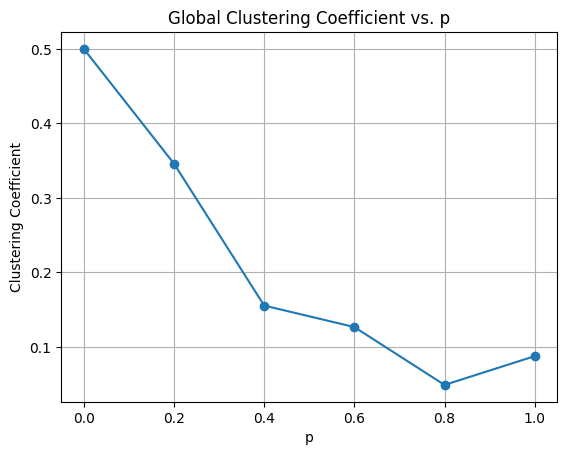

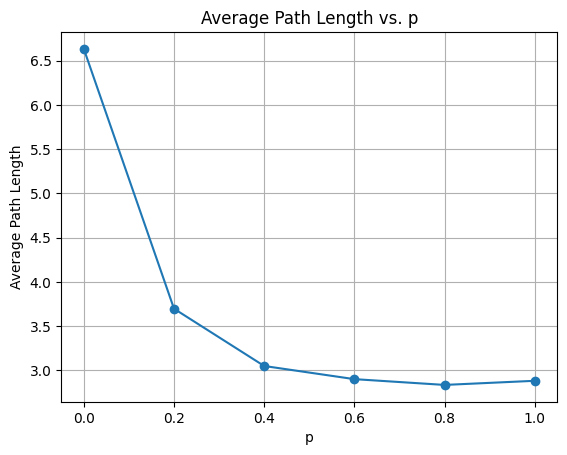

In [ ]:
def small_world_experiment(n=50, k=4, p_values=[0, 0.2, 0.4, 0.6, 0.8, 1.0]):
    ccs = []
    apls = []
    for p in p_values:
        #build the WS graph (n nodes, each connected to k neighbors on each side, rewired w prob p)
        G = nx.watts_strogatz_graph(n, k, p)
        #compute global clustering
        ccs.append(nx.average_clustering(G))
        #compute apl
        if nx.is_connected(G):
            apls.append(nx.average_shortest_path_length(G))
        else:
            #measure on largest connected component
            largest_cc = max(nx.connected_components(G), key=len)
            G_lcc = G.subgraph(largest_cc).copy()
            apls.append(nx.average_shortest_path_length(G_lcc))

    return p_values, ccs, apls

p_vals = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
p_values, ccs, apls = small_world_experiment(n=50, k=4, p_values=p_vals)

#PLOT 1: CC vs p
plt.figure()
plt.plot(p_values, ccs, marker='o')
plt.title('Global Clustering Coefficient vs. p')
plt.xlabel('p')
plt.ylabel('Clustering Coefficient')
plt.grid(True)
plt.show()

#PLOT 2: APL vs p
plt.figure()
plt.plot(p_values, apls, marker='o')
plt.title('Average Path Length vs. p')
plt.xlabel('p')
plt.ylabel('Average Path Length')
plt.grid(True)
plt.show()

### Explination

* **When \(p=0\)**: No edges are rewired. You have a **regular ring lattice** with high clustering and a relatively **large** average path length.  
* For small \(p\): A few “shortcuts” appear; the network’s average path length **drops sharply**, yet the lattice still retains most of its local structure — so **clustering stays high**.  
* For intermediate: The network is in the “small-world” regime, combining **high clustering** and **relatively small** path length.  
* As \(p -> 1\): The lattice is essentially **random**. Clustering drops **much lower** while the average path length is **very small** (random edges provide many shortcuts).

These observations illustrate the classic Watts–Strogatz “small-world” transition.

# Question 4

### Taken from Geeks4Geeks to verify answer

In [ ]:
# Python program to find strongly connected components in a given
# directed graph using Tarjan's algorithm (single DFS)
#Complexity : O(V+E)

from collections import defaultdict

# This class represents an directed graph
# using adjacency list representation


class Graph:

	def __init__(self, vertices):
		# No. of vertices
		self.V = vertices

		# default dictionary to store graph
		self.graph = defaultdict(list)

		self.Time = 0

	# function to add an edge to graph
	def addEdge(self, u, v):
		self.graph[u].append(v)

	'''A recursive function that find finds and prints strongly connected
	components using DFS traversal
	u --> The vertex to be visited next
	disc[] --> Stores discovery times of visited vertices
	low[] -- >> earliest visited vertex (the vertex with minimum
				discovery time) that can be reached from subtree
				rooted with current vertex
	st -- >> To store all the connected ancestors (could be part
		of SCC)
	stackMember[] --> bit/index array for faster check whether
				a node is in stack
	'''

	def SCCUtil(self, u, low, disc, stackMember, st):

		# Initialize discovery time and low value
		disc[u] = self.Time
		low[u] = self.Time
		self.Time += 1
		stackMember[u] = True
		st.append(u)

		# Go through all vertices adjacent to this
		for v in self.graph[u]:

			# If v is not visited yet, then recur for it
			if disc[v] == -1:

				self.SCCUtil(v, low, disc, stackMember, st)

				# Check if the subtree rooted with v has a connection to
				# one of the ancestors of u
				# Case 1 (per above discussion on Disc and Low value)
				low[u] = min(low[u], low[v])

			elif stackMember[v] == True:

				'''Update low value of 'u' only if 'v' is still in stack
				(i.e. it's a back edge, not cross edge).
				Case 2 (per above discussion on Disc and Low value) '''
				low[u] = min(low[u], disc[v])

		# head node found, pop the stack and print an SCC
		w = -1 # To store stack extracted vertices
		if low[u] == disc[u]:
			while w != u:
				w = st.pop()
				print(w, end=" ")
				stackMember[w] = False

			print()

	# The function to do DFS traversal.
	# It uses recursive SCCUtil()

	def SCC(self):

		# Mark all the vertices as not visited
		# and Initialize parent and visited,
		# and ap(articulation point) arrays
		disc = [-1] * (self.V)
		low = [-1] * (self.V)
		stackMember = [False] * (self.V)
		st = []

		# Call the recursive helper function
		# to find articulation points
		# in DFS tree rooted with vertex 'i'
		for i in range(self.V):
			if disc[i] == -1:
				self.SCCUtil(i, low, disc, stackMember, st)


# Create a graph given in the above diagram
g1 = Graph(8)
#f1
g1.addEdge(0, 4)
#f2
g1.addEdge(1, 0)
g1.addEdge(1, 2)
g1.addEdge(1, 6)
#f3
g1.addEdge(2, 4)
g1.addEdge(2, 5)
#f4
#NIL
#f5
g1.addEdge(4, 1)
#f6
g1.addEdge(5, 2)
g1.addEdge(5, 3)
g1.addEdge(5, 7)
#f7
g1.addEdge(6, 3)
#f8
g1.addEdge(7, 0)
g1.addEdge(7, 6)
print("SSC in first graph ")
g1.SCC()


SSC in first graph 
3 
6 
7 5 2 1 4 0 
